In [40]:
#importing numpy library
import numpy as np

Linear Regression

In [41]:
class Linear_regression():

#initiating the parameter(learning rate and no of iterations)
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def fit(self,x,y):

    #number of training examples and number of features
    self.m,self.n=x.shape   #number of rows and columns

    #initiating the weight and bias
    self.w=np.zeros(self.n)
    self.b=0
    self.x=x
    self.y=y

    #implementing GRadient Descent
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    y_prediction=self.predict(self.x)

    #calculate gradients
    dw= -(2*(self.x.T).dot(self.y-y_prediction))/self.m
    db= -2*np.sum(self.y-y_prediction)/self.m

    #updating the weights
    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db


  def predict(self,x):
    return x.dot(self.w)+self.b


Using Linear Regression Model for Prediction

In [42]:
# importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data PreProcessing


In [43]:
#loading thr data from csv file to pandas DataFrame
salary_data=pd.read_csv('/content/salary_data.csv')

In [44]:
#printing the first 5 columns of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [45]:
#last 5 rows of the dataframe
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [46]:
#number of rows and columns in the dataframe
salary_data.shape


(30, 2)

In [47]:
#checking for missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Splitting the features and target

In [48]:
x=salary_data.iloc[:,:-1].values
y=salary_data.iloc[0:,1].values

In [49]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [50]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into training and test data

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Training the Linear regression model

In [52]:
model=Linear_regression(learning_rate=0.02,no_of_iterations=1000)

In [53]:
model.fit(x_train,y_train)

In [54]:
#printing the parameter values(weights and bias)
print('weight=',model.w[0])
print('bias=',model.b)

weight= 9313.751221252842
bias= 26772.645809264588


y=9313(x)+26772,                        
salary=9313(experiance)+26772


Predict the salary value for test data

In [55]:
test_data_prediction=model.predict(x_test)

In [56]:
print(test_data_prediction)

[ 40743.27264114 122704.28338817  64959.0258164   63096.27557215
 115253.28241117 107802.28143416]


Visualizing the predicted value and actual value


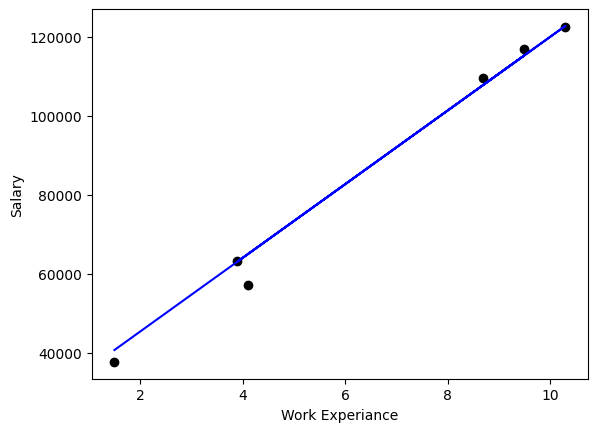

In [57]:
plt.scatter(x_test,y_test,color='black')
plt.plot(x_test,test_data_prediction,color='blue')
plt.xlabel('Work Experiance')
plt.ylabel('Salary')
plt.show()